<img src="cover_page.jpg" alt="Alt text" width="700"/>

##### **Clustering**
Es una técnica de machine learning que pertenece a la categoría de los algoritmos no supervisados.
Es decir, **No contamos con variables independientes ni dependientes**.
El objetivo de esta técnica es agrupar los datos que presentan entre ellos ciertas semejanzas, características, etc.
y por consecuencia, por discriminación identificar los datos que no pertenecen a este grupo.
**Aplicaciones:**
* Marketing digital
* Taxonomías o clasificaciones de animales
* Detección del epicentro en los terremótos
* Urbanismo

In [46]:
# Cargar la librería para calcular la matriz de distancia
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances

In [47]:
# Importar el dataset que contiene preferencias de tres  peliculas. En este caso un archivo
# separado por el caracter ;
data = pd.read_csv("movies.csv", sep=",")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [48]:
# El dataset esta integrado por 10 filas una por cada usuario y tres columnas de evaluación de tres películas
# La nota de evaluación va de 0 a 10
# Filtrar las tres columnas relacionadas con las calificaciones, filtramos la columna 1 y creamos listas
movies = data.columns.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [49]:
# Cálculo de las distancias usaremos tres métodos: manhattan, Euclides, el factor de p
dd1 = distance_matrix(data[movies], data[movies], p=1) # distancia de manhattan (x2-x1)+(x2-x1)
dd2 = distance_matrix(data[movies], data[movies], p=2) # distancia de euclides SQRT((x2-x1)^2+(x2-x1)^2)
dd10 = distance_matrix(data[movies], data[movies], p=10) # distancia con factor de potencia igual a 10

In [50]:
# Distancia de  manhattan
dd1

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

In [51]:
# Distancia de Euclides
dd2

array([[ 0.        ,  6.68505797, 10.14347081,  6.22976725,  3.44963766,
         4.74236228,  7.24499827,  5.04777179,  3.63318042,  0.41231056],
       [ 6.68505797,  0.        ,  7.6223356 , 10.35470907,  5.33760246,
         4.63465209,  0.6164414 ,  3.6180105 ,  8.01560977,  6.57875368],
       [10.14347081,  7.6223356 ,  0.        ,  8.66602562, 10.77914653,
         6.00499792,  7.62627039, 10.01049449,  8.42436941,  9.77036335],
       [ 6.22976725, 10.35470907,  8.66602562,  0.        ,  8.84816365,
         6.47610994, 10.82312339,  9.95841353,  3.48281495,  5.89067059],
       [ 3.44963766,  5.33760246, 10.77914653,  8.84816365,  0.        ,
         6.11310069,  5.92199291,  2.16794834,  6.70969448,  3.61247837],
       [ 4.74236228,  4.63465209,  6.00499792,  6.47610994,  6.11310069,
         0.        ,  4.94974747,  5.98748695,  3.94588393,  4.43170396],
       [ 7.24499827,  0.6164414 ,  7.62627039, 10.82312339,  5.92199291,
         4.94974747,  0.        ,  4.15331193

In [52]:
# Distancia potencia 10
dd10

array([[0.        , 5.80151405, 7.87518912, 4.71580324, 3.4       ,
        4.40000323, 6.40084969, 4.40102467, 3.20008504, 0.3010246 ],
       [5.80151405, 0.        , 5.58246346, 7.68068873, 5.3       ,
        4.40000468, 0.6       , 3.4000102 , 6.43515864, 5.60379989],
       [7.87518912, 5.58246346, 0.        , 8.10000659, 7.40891444,
        4.91253202, 5.68944974, 6.57025374, 6.82060178, 7.65836384],
       [4.71580324, 7.68068873, 8.10000659, 0.        , 7.80125508,
        4.71710153, 7.87330678, 8.80020486, 3.00010148, 4.45075873],
       [3.4       , 5.3       , 7.40891444, 7.80125508, 0.        ,
        4.68146419, 5.9       , 1.90030967, 6.60000001, 3.6       ],
       [4.40000323, 4.40000468, 4.91253202, 4.71710153, 4.68146419,
        0.        , 4.50013531, 5.60001891, 3.40168276, 4.20000049],
       [6.40084969, 0.6       , 5.68944974, 7.87330678, 5.9       ,
        4.50013531, 0.        , 4.00000099, 6.59525879, 6.20203476],
       [4.40102467, 3.4000102 , 6.5702537

In [53]:
# Convertir las listas de distancias a dataFrame para facilitar su interpreatción y graficado
def dm_to_df(dd, col_name):
    return pd.DataFrame(dd, index=col_name, columns=col_name)

In [54]:
# Invocar las funciones para obtener el dataFrame con la matriz de distancias
dd1_df = dm_to_df(dd1, data["user_id"])

In [55]:
# Invocar las funciones para obtener el dataFrame con la matriz de distancias
dd2_df = dm_to_df(dd2, data["user_id"])

In [56]:
# Invocar las funciones para obtener el dataFrame con la matriz de distancias
dd10_df = dm_to_df(dd10, data["user_id"])

In [57]:
import matplotlib.pyplot as plt
# importar para graficar en 3D
from mpl_toolkits.mplot3d import Axes3D

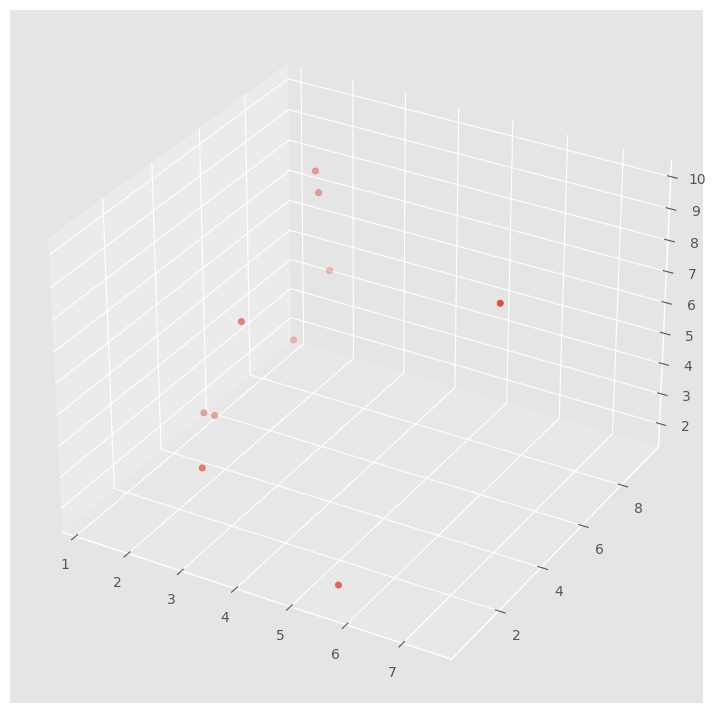

In [58]:
# Graficamos en 3D
# Creamos un objeto figure
fig = plt.figure()
# Declaramos los tres ejes
ax = fig.add_subplot(111, projection = "3d")
# Creamos una gráfica de puntos
ax.scatter(xs = data["star_wars"], ys = data["lord_of_the_rings"], zs=data["harry_potter"])

In [59]:
# Initialize an array to store centroid coordinates using dd1
centroids = []

# Iterate over each centroid index
for i in range(len(dd1[0])):
    # Find data points assigned to the current centroid
    assigned_data_indices = np.where(dd1[:, i] == np.min(dd1, axis=1))[0]

    # Calculate the centroid coordinates as the mean of assigned data points
    centroid = np.mean(data.iloc[assigned_data_indices], axis=0)

    # Append centroid coordinates to the list
    centroids.append(centroid)

# Convert centroids list to numpy array
centroids = np.array(centroids)
print(centroids)

[[ 1.   1.2  4.9  2.1]
 [ 2.   2.1  8.1  7.9]
 [ 3.   7.4  3.   9.9]
 [ 4.   5.6  0.5  1.8]
 [ 5.   1.5  8.3  2.6]
 [ 6.   2.5  3.7  6.5]
 [ 7.   2.   8.2  8.5]
 [ 8.   1.8  9.3  4.5]
 [ 9.   2.6  1.7  3.1]
 [10.   1.5  4.7  2.3]]


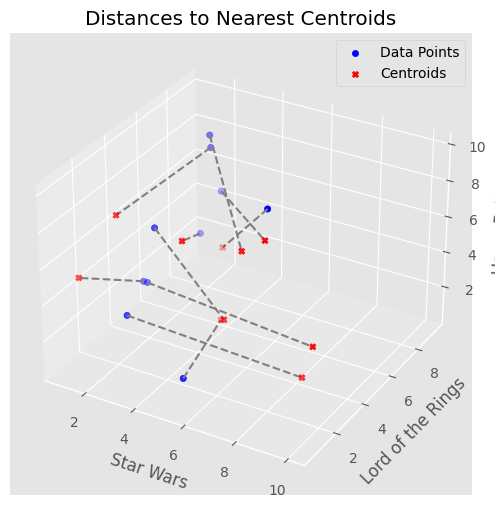

In [60]:

# Plot in 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(data["star_wars"], data["lord_of_the_rings"], data["harry_potter"], c='blue', label='Data Points')

# Plot lines connecting data points to their nearest centroids
for i in range(len(data)):
    nearest_centroid_index = np.argmin(dd1[i])
    nearest_centroid = centroids[nearest_centroid_index]
    ax.plot([data["star_wars"][i], nearest_centroid[0]],
            [data["lord_of_the_rings"][i], nearest_centroid[1]],
            [data["harry_potter"][i], nearest_centroid[2]],
            c='gray', linestyle='--')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', label='Centroids')

# Set labels and title
ax.set_xlabel('Star Wars')
ax.set_ylabel('Lord of the Rings')
ax.set_zlabel('Harry Potter')
ax.set_title('Distances to Nearest Centroids')

# Add legend
ax.legend()

# Show the plot
plt.show()

**K-Means**

K-Means is an unsupervised Clustering algorithm. It is used when we have a lot of unlabeled data. The objective of this algorithm is to find “K” groups (clusters) among the raw data. In this article we will review its basic concepts and see a step-by-step example in python that we can download.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [63]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [64]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [65]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


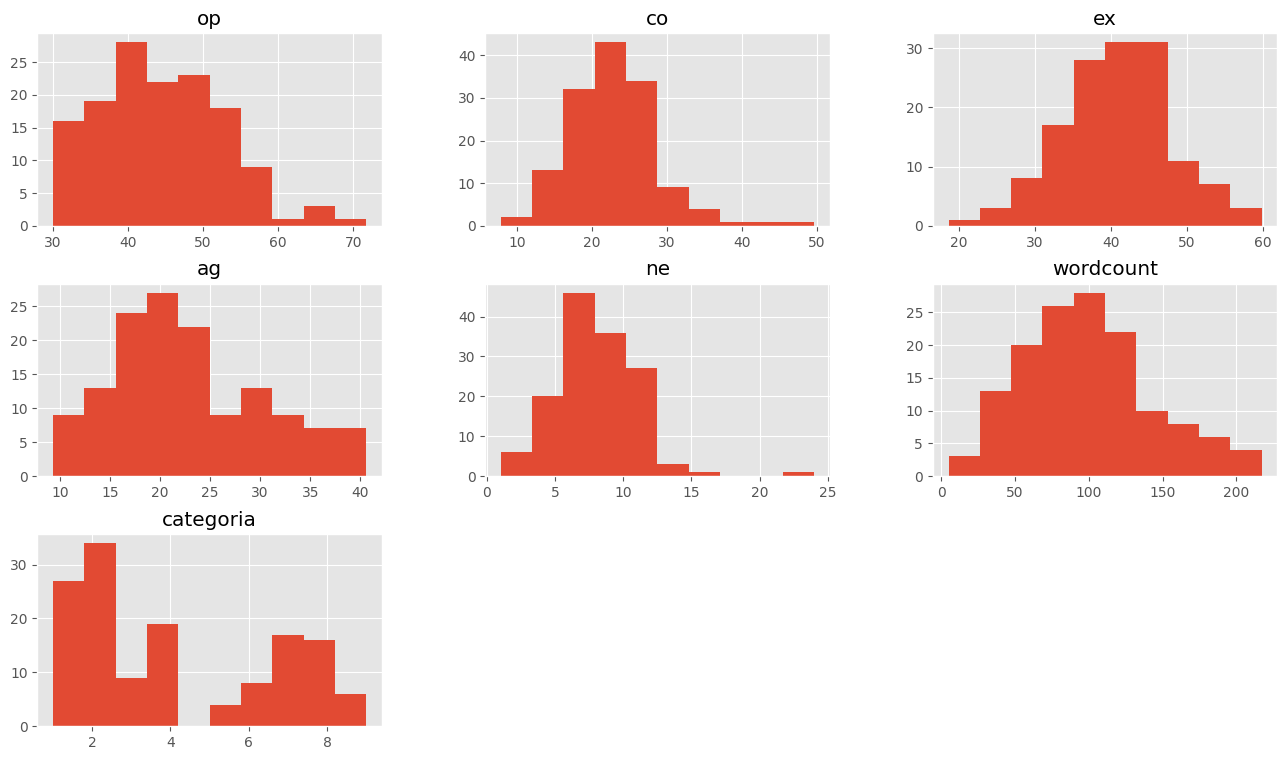

In [66]:
dataframe.drop(['categoria'], axis=1)

dataframe.hist()
plt.show()

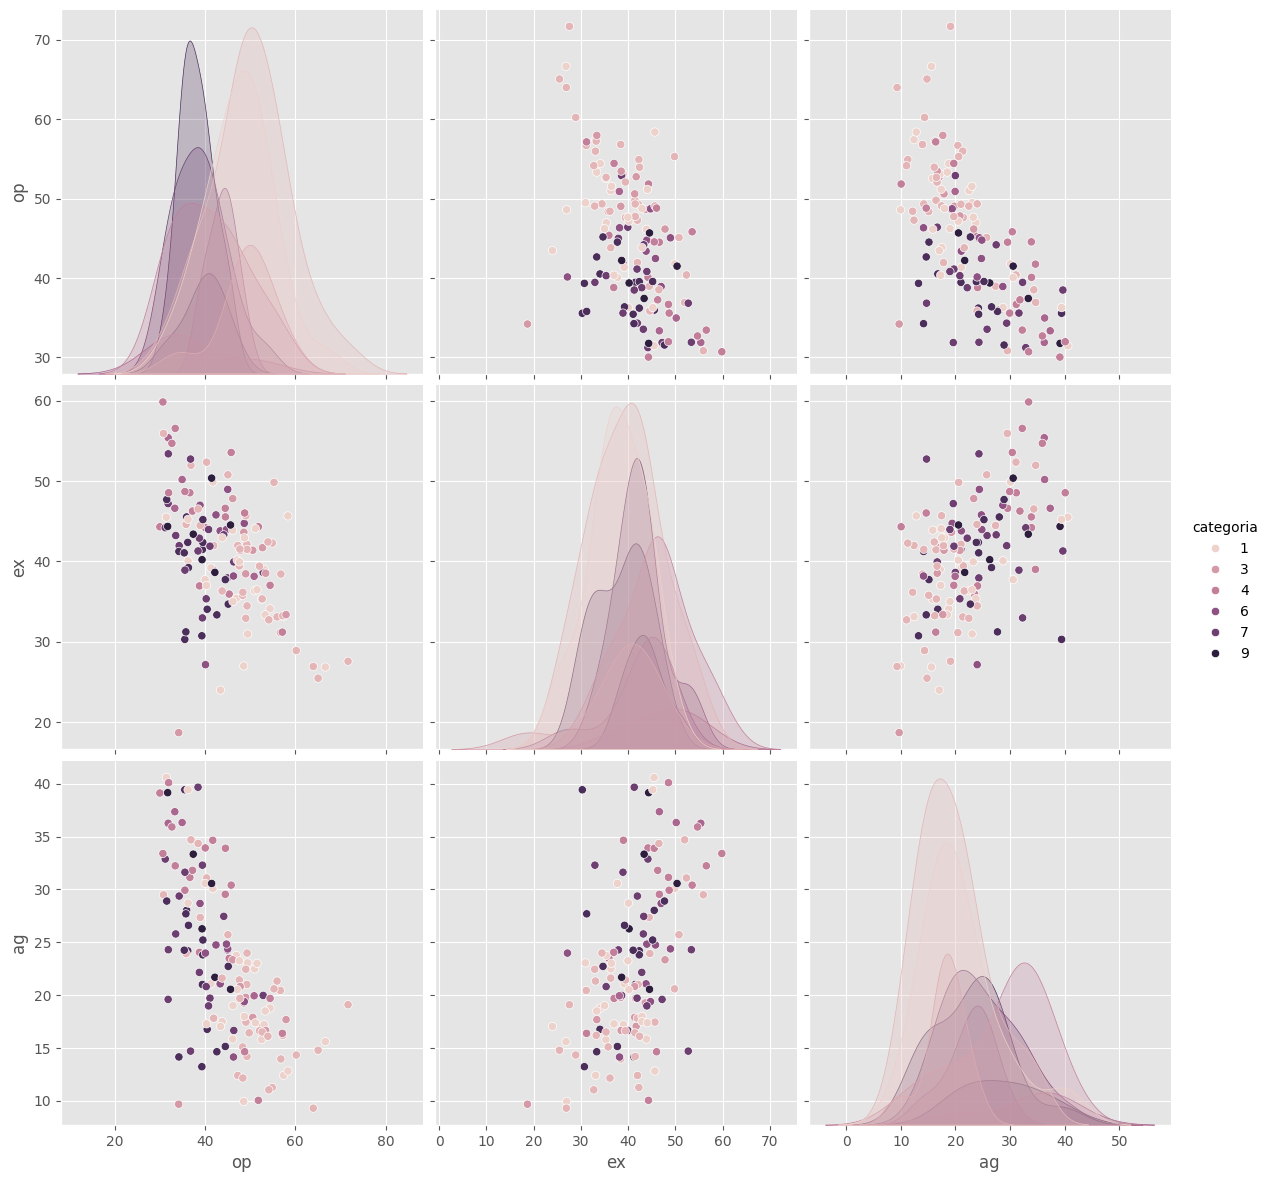

In [67]:
sb.pairplot(dataframe.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

In [68]:

"""
Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo.
Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.
"""

X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

In [69]:
y

array([7, 7, 4, 2, 4, 7, 7, 5, 7, 7, 3, 1, 1, 2, 8, 3, 4, 6, 2, 4, 2, 3,
       3, 7, 2, 4, 8, 1, 4, 3, 8, 1, 2, 7, 4, 5, 1, 2, 2, 1, 6, 2, 6, 1,
       1, 2, 6, 3, 1, 7, 2, 8, 6, 2, 8, 2, 1, 3, 8, 2, 8, 4, 2, 1, 8, 9,
       1, 1, 2, 4, 6, 8, 8, 4, 9, 2, 8, 4, 4, 9, 5, 2, 4, 1, 2, 7, 2, 3,
       2, 1, 2, 7, 2, 2, 1, 7, 7, 2, 4, 6, 1, 1, 1, 4, 2, 4, 2, 8, 7, 5,
       9, 9, 8, 9, 7, 1, 8, 2, 4, 8, 8, 2, 2, 1, 2, 1, 6, 2, 4, 2, 1, 1,
       1, 7, 3, 7, 4, 2, 1, 1])

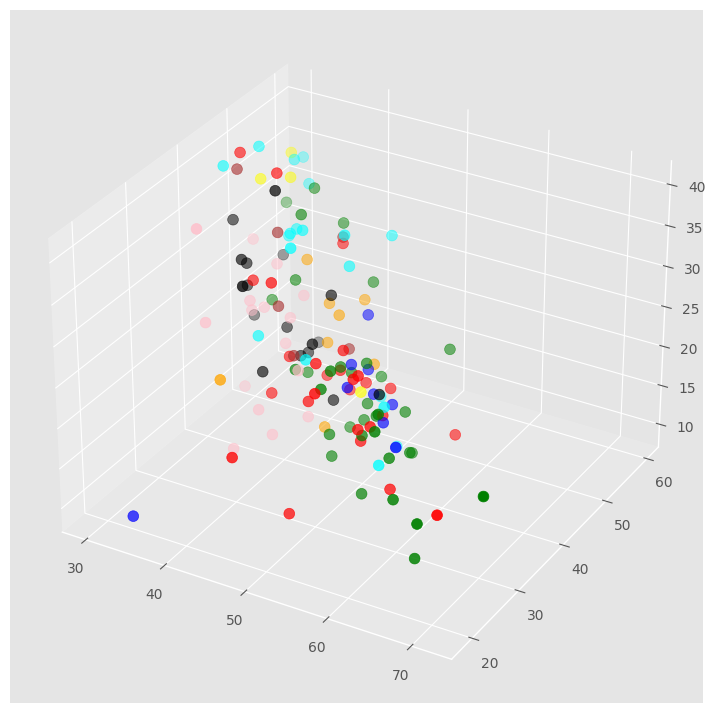

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
plt.show()

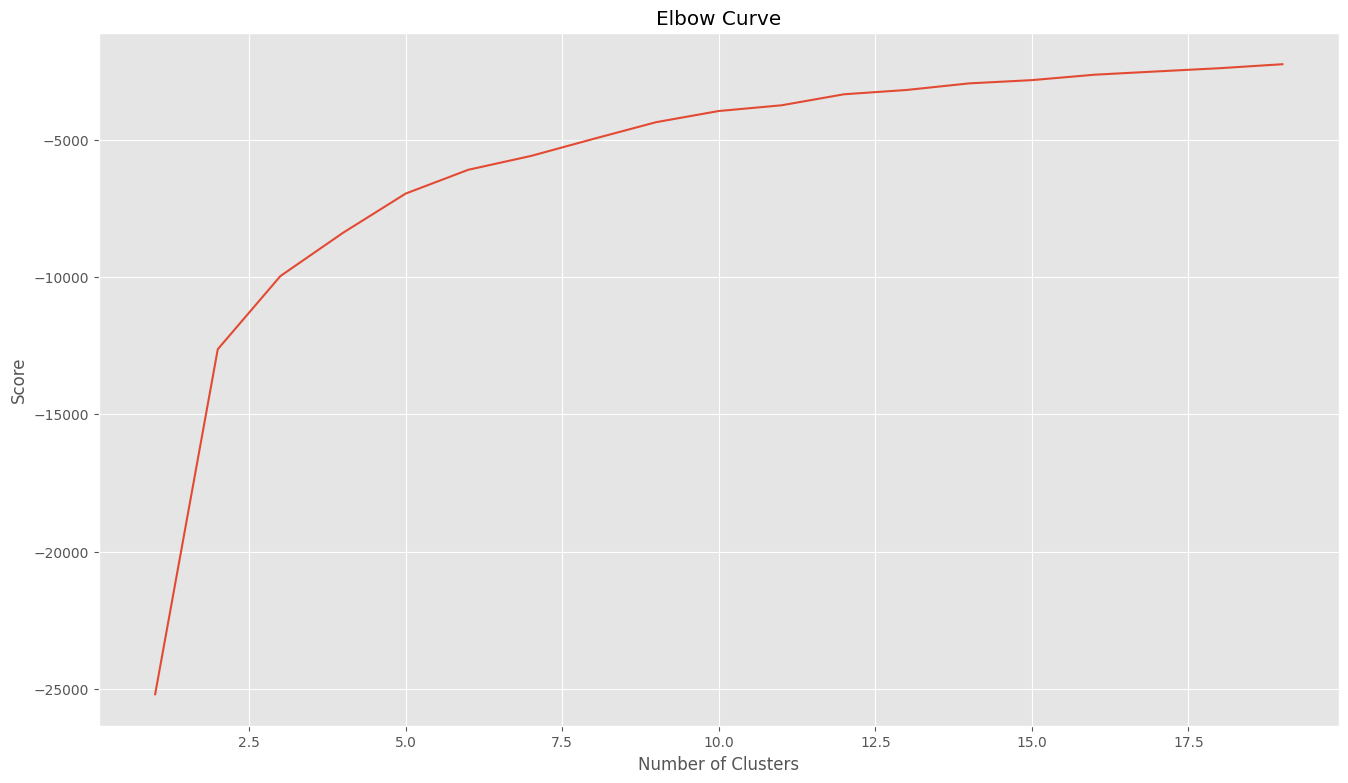

In [71]:
"""
Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo”
que comentábamos antes. Este es nuestro resultado
"""

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [72]:
#Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.

kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[39.63830586 44.75784737 25.86962057]
 [57.92200861 31.5039735  15.67199517]
 [34.5303535  48.01261321 35.01749504]
 [42.302263   33.65449587 20.812626  ]
 [49.6606333  41.17669023 17.548775  ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


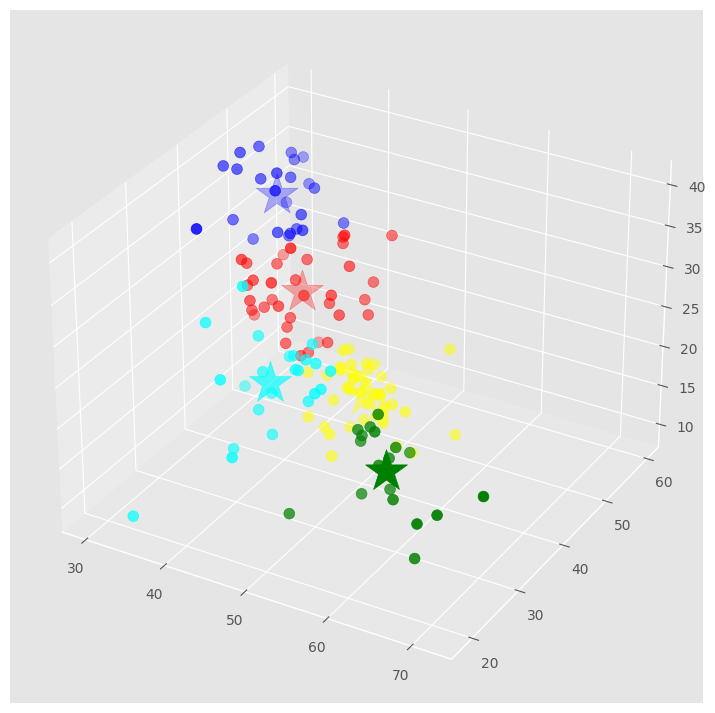

In [73]:
# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

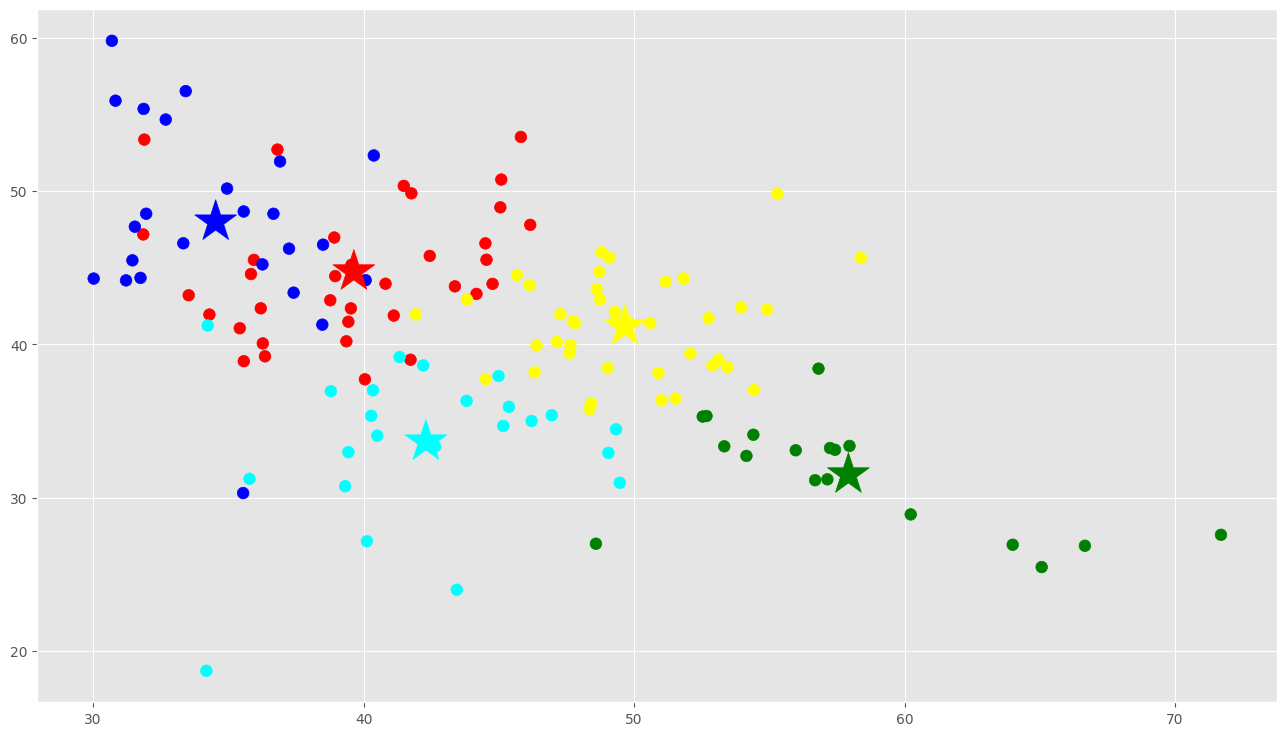

In [74]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

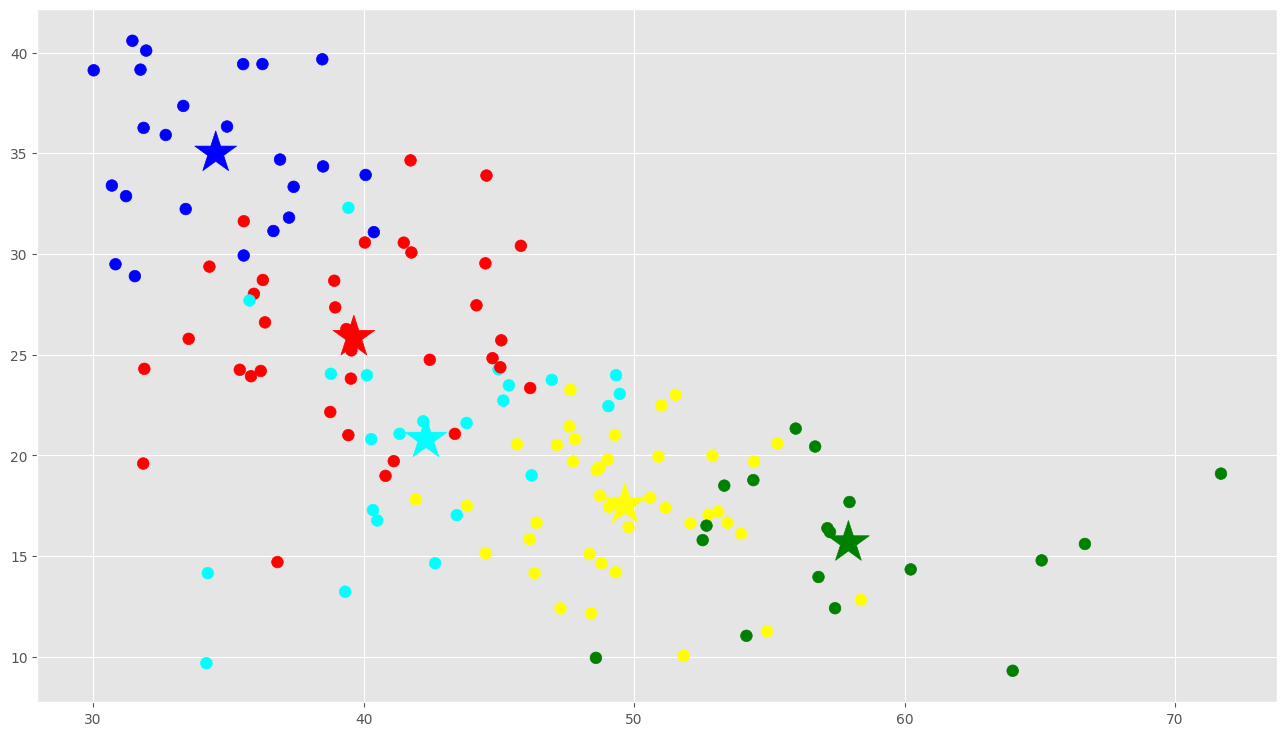

In [75]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

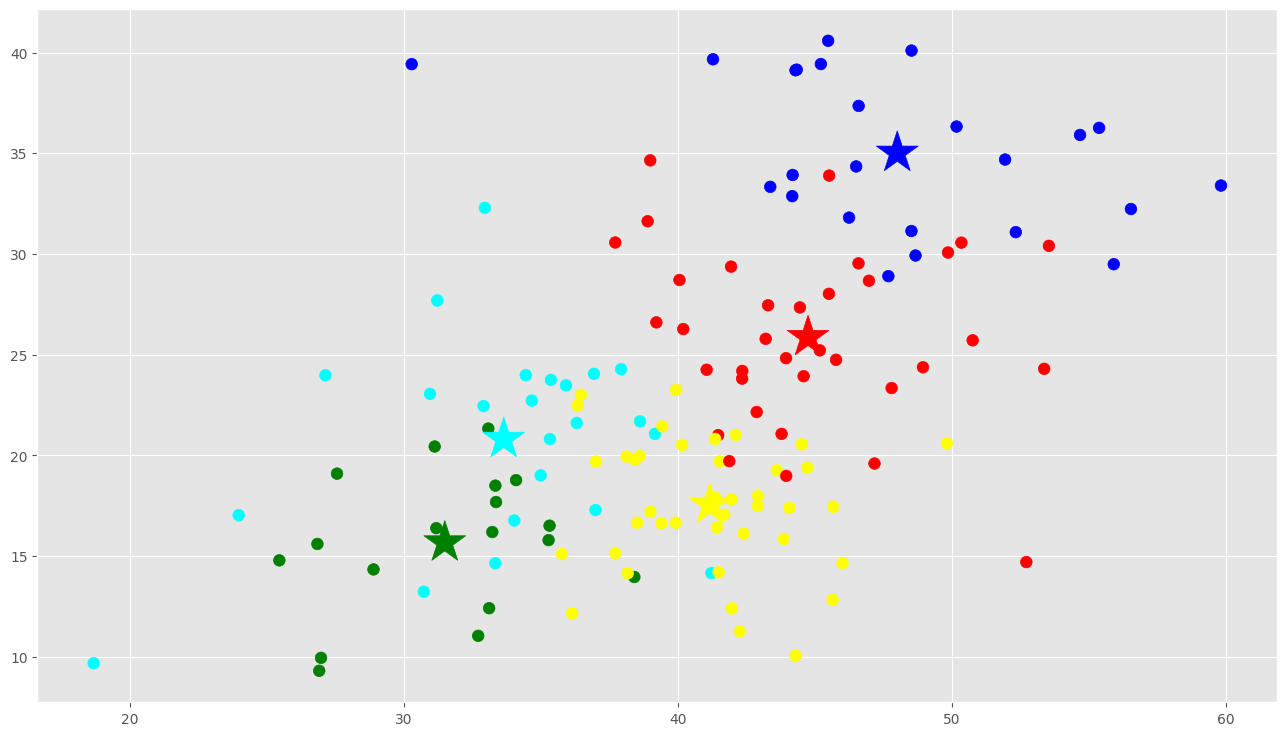

In [76]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [77]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,35
1,green,18
2,blue,24
3,cyan,23
4,yellow,40


In [78]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,3.0
3,3,1.0
4,4,4.0
5,5,NaN
6,6,5.0
7,7,10.0
8,8,7.0
9,9,2.0


Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [79]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([107,  82,  35,  91,  21])

In [80]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

Pablo_Iglesias_
JudgeJudy
DaniMateoAgain
kobebryant
carmenelectra


In [81]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta

new_labels = kmeans.predict(X_new)
print(new_labels)

[4]


#**Conclusions**

K-means is a clustering algorithm widely used in unsupervised learning, it can be used for large datasets and it is simple to implement, is a popular choice for clustering tasks. Determining the number of clusters have an impact in the results and to determine the optimal value of clusters would require knowledge in different techniques. In this activity we have created a model with 5 cluster using the elbow point technique. The development of this activity allowed me to get a better understanding about the concept of clustering and the tools used to extract and graph the information, additionally, it also give me the know how to use these tools in a real life problem.    


